## **PROJETO 3 - CIÊNCIA DOS DADOS**

por Victor de Almeida Cunha

In [481]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

___
# **INTRODUÇÃO**
___

Um dos jogos competitivos on-line mais populares atualmente é League Of Legends, um jogo onde você e mais 4 pessoas devem lutar contra um time de outros 5 jogadores para destruir o Inibidor inimigo. 

Para isso, você utiliza das habilidades do seu herói e dos diversos inimigos espalhados pelo mapa. 

A progressão para a vitória é bem simples: destrua as torres em cada corredor do mapa, destrua o inibidor daquele corredor e destrua o inibidor principal inimigo.

Por ser um jogo competitivo muito popular, vários times e analistas utilizam das estatísticas de cada partida para saber onde que um time errou e até mesmo prever qual time irá ganhar, que é o que iremos tentar achar nesse relatório.

Para isso, possuímos duas bases de dados: uma com partidas com duração de 10 minutos e outra com duração de 15 minutos, todas onde os times eram os melhores jogadores do mundo (ou Challenger).

In [482]:
partidas_10min = pd.read_csv('data\Challenger_Ranked_Games_10minute.csv')
partidas_10min

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,14870,2889,32,6.4,199,53,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,4247155821,1,14497,2617,33,6.6,229,44,0,2,...,[],0,0,0,0,0,0,[],0,0
2,4243963257,0,15617,1757,34,6.8,223,39,0,3,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,4241678498,0,15684,1439,35,7.0,251,64,0,3,...,[],0,0,0,0,0,0,[],0,0
4,4241538868,1,17472,3512,35,7.0,257,46,0,7,...,[],0,0,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,4143231833,0,16762,5072,36,7.2,206,52,0,7,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26405,4157911901,0,35765,1440,39,7.8,191,16,0,18,...,[],3,1,0,2,0,0,[],0,0
26406,3764171638,0,15712,4137,34,6.8,218,55,0,3,...,[],0,0,0,0,0,0,[],0,0
26407,4110201724,1,15850,3220,33,6.6,193,48,0,6,...,[],0,0,0,0,0,0,[],0,0


Essa base de dados possui diversos dados da partida, entre eles:
- Quantidade de ouro que um time possui;
- O nível combinado de todos os heróis de um time;
- Quantos jogadores inimigos e minions (inimigos controlados por IA) foram mortos;
- Qual time derrubou a primeira torre do mapa.

Para começar a analisar nossa base de dados, vamos primeiro tirar as colunas que não vão interessar para a nossa análise, que são:
- ID da partida;
- Qual foi o corredor onde a primeira torre destruída por um time estava;
- Tipo de dragões derrotados.

In [483]:
partidas_10min = partidas_10min.drop(columns=['gameId','blueFirstTowerLane','blueDragnoType','redFirstTowerLane','redDragnoType'])
partidas_10min

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
0,0,14870,2889,32,6.4,199,53,0,3,9,...,0,0,0,0,0,0,0,1,1,0
1,1,14497,2617,33,6.6,229,44,0,2,3,...,0,0,0,0,0,0,0,0,0,0
2,0,15617,1757,34,6.8,223,39,0,3,11,...,1,0,1,0,0,1,0,1,1,1
3,0,15684,1439,35,7.0,251,64,0,3,4,...,0,0,0,0,0,0,0,0,0,0
4,1,17472,3512,35,7.0,257,46,0,7,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,0,16762,5072,36,7.2,206,52,0,7,5,...,0,0,0,0,0,0,0,1,1,1
26405,0,35765,1440,39,7.8,191,16,0,18,27,...,0,0,3,1,0,2,0,0,0,0
26406,0,15712,4137,34,6.8,218,55,0,3,0,...,0,0,0,0,0,0,0,0,0,0
26407,1,15850,3220,33,6.6,193,48,0,6,4,...,0,0,0,0,0,0,0,0,0,0


Agora, vamos renomear nossas categorias qualitativas.

A categoria "First Blood" diz qual time matou o primeiro inimigo da partida. Ou seja, se o time azul teve a primeira eliminação ou se o time vermelho teve a primeira eliminação da partida.

In [484]:
partidas_10min['blueFirstBlood'] = partidas_10min['blueFirstBlood'].astype('category')
partidas_10min['blueFirstBlood'] = partidas_10min['blueFirstBlood'].cat.rename_categories({0:'No',1:'Yes'})

partidas_10min['redFirstBlood'] = partidas_10min['redFirstBlood'].astype('category')
partidas_10min['redFirstBlood'] = partidas_10min['redFirstBlood'].cat.rename_categories({0:'No',1:'Yes'})

A categoria "First Tower" diz se o time analisado destruiu a primeira torre da partida ou não, parecido com a "First Blood".

In [485]:
partidas_10min['blueFirstTower'] = partidas_10min['blueFirstTower'].astype('category')
partidas_10min['blueFirstTower'] = partidas_10min['blueFirstTower'].cat.rename_categories({0:'No',1:'Yes'})

partidas_10min['redFirstTower'] = partidas_10min['redFirstTower'].astype('category')
partidas_10min['redFirstTower'] = partidas_10min['redFirstTower'].cat.rename_categories({0:'No',1:'Yes'})

Analogamente, a categoria "First Inhibitor" diz quem destruiu o primeiro inibidor.

In [486]:
partidas_10min['blueFirstInhibitor'] = partidas_10min['blueFirstInhibitor'].astype('category')
partidas_10min['blueFirstInhibitor'] = partidas_10min['blueFirstInhibitor'].cat.rename_categories({0:'No',1:'Yes'})

partidas_10min['redFirstInhibitor'] = partidas_10min['redFirstInhibitor'].astype('category')
partidas_10min['redFirstInhibitor'] = partidas_10min['redFirstInhibitor'].cat.rename_categories({0:'No',1:'Yes'})

Agora, vamos dividir nossa base de dados para os times azul e vermelho.

In [487]:
partidas_10min_blue = partidas_10min.iloc[:,:23]
partidas_10min_red = partidas_10min.iloc[:,24:45]

In [488]:
partidas_10min_blue

,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,blueFirstTower,blueFirstInhibitor,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragon,blueRiftHeralds
0,0,14870,2889,32,6.4,199,53,No,3,9,...,No,No,0,0,0,0,0,0,0,0
1,1,14497,2617,33,6.6,229,44,No,2,3,...,No,No,0,0,0,0,0,0,0,1
2,0,15617,1757,34,6.8,223,39,No,3,11,...,No,No,0,0,0,0,0,0,0,0
3,0,15684,1439,35,7.0,251,64,No,3,4,...,No,No,0,0,0,0,0,0,0,0
4,1,17472,3512,35,7.0,257,46,No,7,5,...,No,No,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,0,16762,5072,36,7.2,206,52,No,7,5,...,No,No,0,0,0,0,0,0,0,0
26405,0,35765,1440,39,7.8,191,16,No,18,27,...,Yes,No,2,0,2,0,0,1,1,0
26406,0,15712,4137,34,6.8,218,55,No,3,0,...,No,No,0,0,0,0,0,0,0,0
26407,1,15850,3220,33,6.6,193,48,No,6,4,...,No,No,0,0,0,0,0,1,1,0


In [489]:
partidas_10min_red

,redTotalGolds,redCurrentGolds,redTotalLevel,redAvgLevel,redTotalMinionKills,redTotalJungleMinionKills,redFirstBlood,redKill,redDeath,redAssist,...,redWardKills,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon
0,18397,3297,36,7.2,229,32,No,9,3,22,...,8,No,No,0,0,0,0,0,1,1
1,15893,4778,36,7.2,234,57,No,3,2,2,...,5,No,No,0,0,0,0,0,0,0
2,20409,4324,37,7.4,236,45,No,11,3,11,...,4,Yes,No,1,0,0,1,0,1,1
3,16150,3633,35,7.0,256,48,No,4,3,5,...,7,No,No,0,0,0,0,0,0,0
4,15588,3323,34,6.8,194,56,No,5,7,7,...,3,No,No,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,14779,3709,36,7.2,205,67,No,5,7,1,...,4,No,No,0,0,0,0,0,1,1
26405,42001,9568,44,8.8,279,73,No,27,18,20,...,0,No,No,3,1,0,2,0,0,0
26406,14845,1345,34,6.8,239,60,No,0,3,0,...,3,No,No,0,0,0,0,0,0,0
26407,14773,3673,33,6.6,204,52,No,4,6,8,...,4,No,No,0,0,0,0,0,0,0


Para poder realizar nossa predição, precisamos utilizar algum tipo de regressão.

___
## **REALIZANDO A REGRESSÃO LOGIT**
___

Em uma regressão, utilizamos diferentes variáveis explicativas para explicar uma variável independente (target). No caso do nosso banco de dados, queremos prever a vitória de um time com os dados fornecidos.

Normalmente, utilizaríamos uma regressão múltipla para achar os dados mais relevantes e fazer uma predição. Porém, como a nossa variável target é binária (vitória ou derrota), essa regressão não pode ser utilizada.

Por conta disso, vamos utilizar uma outra regressão: **a regressão logit**.

Para entender em detalhes, siga os links na referência.

A regressão logit parte do princípio de um resultado binário: sucesso ou falha, vitória ou derrota. Para isso, a regressão analisa as probabilidades de sucesso.

Vamos utilizar um exemplo simples para visualizar como isso funciona:

Digamos que, ao jogar uma moeda, queremos que caia coroa. Como essa moeda tem apenas dois lados (cara e coroa), temos uma probabilidade de 50% de sucesso.

In [490]:
exemplo = .5

Mas qual é a chance de sucesso?

Essa chance é medida como a razão entre a probabilidade de sucesso e a probabilidade de falha.

In [491]:
exemplo_c = 1-exemplo

chances = exemplo/exemplo_c
print("Chances de sucesso:",chances,"para 1.")

Chances de sucesso: 1.0 para 1.


Para entender melhor como esse conceito se aplica à regressão logit, siga [esse link](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/).

Mas chega de explicações, estamos enrolando muito. Para começar, vamos montar uma função que faz a regressão logit dado um conjunto de dados.

In [492]:
def regress(Y): # Y é o banco de dados que iremos utilizar.
    columns = list(Y.columns)
    formula_string = columns[0] + ' ~ ' # Essa é a string que realiza a fórmula da nossa regressão.
    
    i = 1
    while i < len(columns): # Itera sobre as colunas explicativas.
        col = columns[i]
        formula_string += col
        if i < len(columns)-1:
            formula_string += ' + '
        i += 1

    model = smf.logit(formula_string, data=Y) # Realiza a regressão e retorna os resultados.
    results = model.fit()
    
    return results

Agora, vamos usar essa nossa função para analisar os dados da nossa base de dados dos jogos até 10 minutos.

In [493]:
results = regress(partidas_10min_blue) # Estamos olhando apenas o time azul.
results.summary()

         Current function value: 0.537835
         Iterations: 35


c:\Users\Victor Cunha\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\Victor Cunha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Victor Cunha\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26409
Model:                          Logit   Df Residuals:                    26389
Method:                           MLE   Df Model:                           19
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2241
Time:                        17:53:57   Log-Likelihood:                -14204.
converged:                      False   LL-Null:                       -18305.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.0780      0.275    -18.472      0.000      -5.617      -4.539
blueFirstTower[T.Yes]          0.3986      0.108      3.700      0.000       0.187       0.610
blueFirstInhibitor[T.Yes]    7.33e+04   3.28e+07      0.002      0.998   -6.43e+07    6.44e+07
blueTotalGolds              6.274e-05   1.49e-05      4.223      0.000    3.36e-05    9.19e-05
blueCurrentGolds            7.707e-07   1.23e-05      0.063      0.950   -2.34e-05    2.49e-05
blueTotalLevel                 0.0463        nan        nan        nan         nan         nan
blueAvgLevel                   0.0090        nan        nan        nan         nan         nan
blueTotalMinionKills           0.0076      0.001     10.890      0.000       0.006       0.009
blueTotalJungleMinionKills     0.0106      0.001      7.197      0.000       0.008       0.014
blueKill                       0.2329      0.009     26.891      0.000       0.216       0.250
blueDeath                     -0.2377      0.005    -45.070      0.000      -0.248      -0.227
blueAssist                    -0.0068      0.004     -1.853      0.064      -0.014       0.000
blueWardPlaced                -0.0003      0.001     -0.337      0.736      -0.002       0.001
blueWardKills                  0.0054      0.006      0.900      0.368      -0.006       0.017
blueTowerKills                -0.2158        nan        nan        nan         nan         nan
blueMidTowerKills              0.0403        nan        nan        nan         nan         nan
blueTopTowerKills             -0.2228        nan        nan        nan         nan         nan
blueBotTowerKills             -0.0333        nan        nan        nan         nan         nan
blueInhibitor              -7.329e+04   3.28e+07     -0.002      0.998   -6.44e+07    6.43e+07
blueFirstDragon                1.1390      0.362      3.147      0.002       0.430       1.848
blueDragon                    -0.6567      0.360     -1.823      0.068      -1.363       0.049
blueRiftHeralds                0.1628      0.038      4.240      0.000       0.088       0.238
==============================================================================================
"""

Nossa. São **MUITOS** dados. E **MUITOS** números. Como que partimos daqui?

____
## **MELHORANDO NOSSA REGRESSÃO**
____

Nos resultados acima, o resultado que mais vai importar para nós, no momento, é a coluna P>|z|, que mostra os *valores-p* de cada uma das nossas variáveis explicativas.

O valor-p está diretamente relacionado com um número chamado *nível de significância*, que é, basicamente, o nível de precisão que queremos dos nossos dados. Esse valor é utilizado para diversos tipos de distribuições para encontrar erros, valores médios, etc.

Para essa regressão, vamos adotar um nível de significância de 10%. Isso significa que **o *valor-p* de cada variável não pode passar de 10%, ou 0.1**.

Portanto, vamos remover da nossa análise a variável com o maior valor-p acima de 10%, que é *blueInhibitor*, e realizar uma nova regressão.

In [494]:
partidas_10min_blue1 = partidas_10min_blue.drop(columns=['blueInhibitor'])
results = regress(partidas_10min_blue1)
results.summary()

Optimization terminated successfully.
         Current function value: 0.537838
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26409
Model:                          Logit   Df Residuals:                    26390
Method:                           MLE   Df Model:                           18
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2241
Time:                        17:53:57   Log-Likelihood:                -14204.
converged:                       True   LL-Null:                       -18305.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.0793      0.275    -18.479      0.000      -5.618      -4.541
blueFirstTower[T.Yes]          0.4004      0.107      3.725      0.000       0.190       0.611
blueFirstInhibitor[T.Yes]      0.6153      0.318      1.934      0.053      -0.008       1.239
blueTotalGolds               6.28e-05   1.49e-05      4.228      0.000    3.37e-05    9.19e-05
blueCurrentGolds            7.851e-07   1.23e-05      0.064      0.949   -2.34e-05    2.49e-05
blueTotalLevel                 0.0462   2.15e+04   2.15e-06      1.000   -4.21e+04    4.21e+04
blueAvgLevel                   0.0092   1.07e+05    8.6e-08      1.000   -2.11e+05    2.11e+05
blueTotalMinionKills           0.0076      0.001     10.895      0.000       0.006       0.009
blueTotalJungleMinionKills     0.0107      0.001      7.199      0.000       0.008       0.014
blueKill                       0.2329      0.009     26.890      0.000       0.216       0.250
blueDeath                     -0.2377      0.005    -45.069      0.000      -0.248      -0.227
blueAssist                    -0.0068      0.004     -1.851      0.064      -0.014       0.000
blueWardPlaced                -0.0003      0.001     -0.337      0.736      -0.002       0.001
blueWardKills                  0.0054      0.006      0.900      0.368      -0.006       0.017
blueTowerKills                -0.2171   1.84e+06  -1.18e-07      1.000    -3.6e+06     3.6e+06
blueMidTowerKills              0.0394   1.84e+06   2.14e-08      1.000    -3.6e+06     3.6e+06
blueTopTowerKills             -0.2227   1.84e+06  -1.21e-07      1.000    -3.6e+06     3.6e+06
blueBotTowerKills             -0.0337   1.84e+06  -1.84e-08      1.000    -3.6e+06     3.6e+06
blueFirstDragon                1.1385      0.362      3.146      0.002       0.429       1.848
blueDragon                    -0.6562      0.360     -1.822      0.068      -1.362       0.050
blueRiftHeralds                0.1627      0.038      4.239      0.000       0.087       0.238
==============================================================================================
"""

Alguns valores mudaram com essa nova análise.

Vamos repetir esse mesmo processo até que todas as nossas variáveis tenham um valor-p abaixo de 10%.

**OBS**: *Para simplicidade e remover a poluição visual, os resultados específicos de cada iteração foram escondidos. Basta descomentar a linha e rodar a célula para ver os resultados.*

In [495]:
partidas_10min_blue2 = partidas_10min_blue1.drop(columns=['blueTotalLevel','blueAvgLevel','blueTowerKills','blueMidTowerKills','blueTopTowerKills','blueBotTowerKills'])
results = regress(partidas_10min_blue2)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538857
         Iterations 7


In [496]:
partidas_10min_blue3 = partidas_10min_blue2.drop(columns=['blueCurrentGolds'])
results = regress(partidas_10min_blue3)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538857
         Iterations 7


In [497]:
partidas_10min_blue4 = partidas_10min_blue3.drop(columns=['blueWardPlaced'])
results = regress(partidas_10min_blue4)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538865
         Iterations 7


In [498]:
partidas_10min_blue5 = partidas_10min_blue4.drop(columns=['blueWardKills'])
results = regress(partidas_10min_blue5)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538873
         Iterations 7


In [499]:
partidas_10min_blue6 = partidas_10min_blue5.drop(columns=['blueFirstTower'])
results = regress(partidas_10min_blue6)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538883
         Iterations 7


In [500]:
partidas_10min_blue7 = partidas_10min_blue6.drop(columns=['blueAssist'])
results = regress(partidas_10min_blue7)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.538923
         Iterations 7


In [501]:
partidas_10min_blue8 = partidas_10min_blue7.drop(columns=['blueFirstInhibitor'])
results = regress(partidas_10min_blue8)
results.summary()

Optimization terminated successfully.
         Current function value: 0.538975
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26409
Model:                          Logit   Df Residuals:                    26400
Method:                           MLE   Df Model:                            8
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.2224
Time:                        17:53:58   Log-Likelihood:                -14234.
converged:                       True   LL-Null:                       -18305.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.8630      0.188    -20.558      0.000      -4.231      -3.495
blueTotalGolds                 0.0001   8.38e-06     13.822      0.000    9.94e-05       0.000
blueTotalMinionKills           0.0065      0.001     10.535      0.000       0.005       0.008
blueTotalJungleMinionKills     0.0100      0.001      6.909      0.000       0.007       0.013
blueKill                       0.2139      0.007     31.186      0.000       0.200       0.227
blueDeath                     -0.2472      0.005    -50.357      0.000      -0.257      -0.238
blueFirstDragon                1.6322      0.360      4.536      0.000       0.927       2.337
blueDragon                    -1.1532      0.358     -3.221      0.001      -1.855      -0.451
blueRiftHeralds                0.1552      0.038      4.136      0.000       0.082       0.229
==============================================================================================
"""

Nessa última iteração, todos os valores-p estão abaixo de 10%. Isso significa que as variáveis que restaram são as variáveis que mais explicam o comportamento da nossa variável principal, que é a vitória ou não do time azul.

Como podemos prever o resultado a partir disso?

___
## **PREVENDO QUAL TIME VAI GANHAR**
___

Utilizando o mesmo pacote que utilizamos para realizar a regressão, vamos ver qual time a nossa regressão diz que ganha quando mostramos os dados reais de todas as nossas partidas.

In [502]:
Xtest = partidas_10min_blue8.iloc[:,1:]

yhat = results.predict(Xtest)
prediction = list(map(round,yhat))
print('Real:',list(partidas_10min_blue8['blueWins'])[:10])
print('Prediction:',prediction[:10])

Real: [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]
Prediction: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


Imprimimos uma lista reduzida (porque temos quase 27.000 partidas) e vemos que alguns resultados não batem. Vamos ver o quanto que a nossa regressão acertou.

In [503]:
cm = confusion_matrix(list(partidas_10min_blue8['blueWins']), prediction) # Definimos uma matriz de confusão.

print(f'Test accuracy =', accuracy_score(list(partidas_10min_blue8['blueWins']), prediction).round(3))

Test accuracy = 0.728


O nosso teste teve uma precisão de 72,8%. Mas quantas partidas ele acertou?

Para isso, vamos mostrar uma ***matriz de confusão***, que já foi montada acima. Essa matriz vai nos mostrar quais resultados são corretos pelo nosso preditor e quais são incorretos.

<AxesSubplot: >

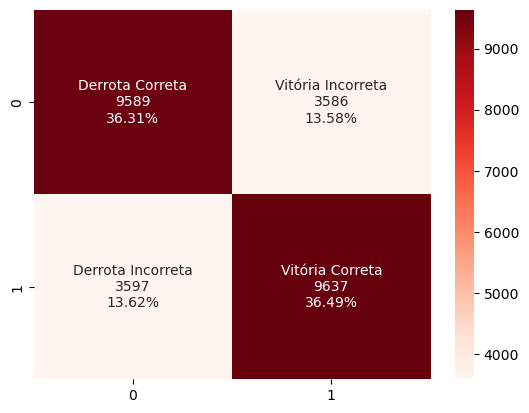

In [504]:
group_names = ['Derrota Correta','Vitória Incorreta','Derrota Incorreta','Vitória Correta']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

Nessa matriz, podemos ver que os resultados corretos são maiores que os incorretos, sendo que o nosso preditor acertou 19.226 partidas.

___
## **REPETINDO PARA PARTIDAS DE 15 MINUTOS**
___

Para as partidas de 15 minutos, vamos repetir o mesmo processo que o anterior. Tudo de novo.

**OBS**: *Para simplicidade e remover a poluição visual, os resultados específicos de cada iteração foram escondidos. Basta descomentar a linha e rodar a célula para ver os resultados.*

In [505]:
partidas_15min = pd.read_csv('data\Challenger_Ranked_Games_15minute.csv')
#partidas_15min

In [506]:
partidas_15min = partidas_15min.drop(columns=['gameId','blueFirstTowerLane','blueDragnoType','redFirstTowerLane','redDragnoType'])
#partidas_15min

In [507]:
partidas_15min['blueFirstBlood'] = partidas_15min['blueFirstBlood'].astype('category')
partidas_15min['blueFirstBlood'] = partidas_15min['blueFirstBlood'].cat.rename_categories({0:'No',1:'Yes'})

partidas_15min['redFirstBlood'] = partidas_15min['redFirstBlood'].astype('category')
partidas_15min['redFirstBlood'] = partidas_15min['redFirstBlood'].cat.rename_categories({0:'No',1:'Yes'})

partidas_15min['blueFirstTower'] = partidas_15min['blueFirstTower'].astype('category')
partidas_15min['blueFirstTower'] = partidas_15min['blueFirstTower'].cat.rename_categories({0:'No',1:'Yes'})

partidas_15min['redFirstTower'] = partidas_15min['redFirstTower'].astype('category')
partidas_15min['redFirstTower'] = partidas_15min['redFirstTower'].cat.rename_categories({0:'No',1:'Yes'})

partidas_15min['blueFirstInhibitor'] = partidas_15min['blueFirstInhibitor'].astype('category')
partidas_15min['blueFirstInhibitor'] = partidas_15min['blueFirstInhibitor'].cat.rename_categories({0:'No',1:'Yes'})

partidas_15min['redFirstInhibitor'] = partidas_15min['redFirstInhibitor'].astype('category')
partidas_15min['redFirstInhibitor'] = partidas_15min['redFirstInhibitor'].cat.rename_categories({0:'No',1:'Yes'})

In [508]:
partidas_15min_blue = partidas_15min.iloc[:,:23]
partidas_15min_red = partidas_15min.iloc[:,24:45]

In [509]:
#partidas_15min_blue

In [510]:
#partidas_15min_red

In [511]:
results = regress(partidas_15min_blue)
#results.summary()

         Current function value: 0.445911
         Iterations: 35


c:\Users\Victor Cunha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [512]:
partidas_15min_blue1 = partidas_15min_blue.drop(columns=['blueTotalLevel','blueAvgLevel','blueTowerKills','blueMidTowerKills','blueTopTowerKills','blueBotTowerKills'])
results = regress(partidas_15min_blue1)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.447274
         Iterations 7


In [513]:
partidas_15min_blue2 = partidas_15min_blue1.drop(columns=['blueInhibitor'])
results = regress(partidas_15min_blue2)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.447275
         Iterations 7


In [514]:
partidas_15min_blue3 = partidas_15min_blue2.drop(columns=['blueAssist'])
results = regress(partidas_15min_blue3)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.447276
         Iterations 7


In [515]:
partidas_15min_blue4 = partidas_15min_blue3.drop(columns=['blueTotalMinionKills'])
results = regress(partidas_15min_blue4)
#results.summary()

Optimization terminated successfully.
         Current function value: 0.447284
         Iterations 7


In [516]:
partidas_15min_blue5 = partidas_15min_blue4.drop(columns=['blueFirstDragon'])
results = regress(partidas_15min_blue5)
results.summary()

Optimization terminated successfully.
         Current function value: 0.447300
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26834
Model:                          Logit   Df Residuals:                    26822
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 May 2024   Pseudo R-squ.:                  0.3547
Time:                        17:53:59   Log-Likelihood:                -12003.
converged:                       True   LL-Null:                       -18600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.9676      0.124    -15.899      0.000      -2.210      -1.725
blueFirstTower[T.Yes]          0.3906      0.037     10.640      0.000       0.319       0.463
blueFirstInhibitor[T.Yes]      1.0072      0.128      7.841      0.000       0.755       1.259
blueTotalGolds              5.437e-05    6.4e-06      8.492      0.000    4.18e-05    6.69e-05
blueCurrentGolds            9.188e-05   1.24e-05      7.438      0.000    6.77e-05       0.000
blueTotalJungleMinionKills     0.0041      0.001      4.352      0.000       0.002       0.006
blueKill                       0.1797      0.006     32.174      0.000       0.169       0.191
blueDeath                     -0.2223      0.004    -55.056      0.000      -0.230      -0.214
blueWardPlaced                -0.0018      0.001     -2.817      0.005      -0.003      -0.001
blueWardKills                 -0.0095      0.004     -2.472      0.013      -0.017      -0.002
blueDragon                     0.4582      0.025     18.537      0.000       0.410       0.507
blueRiftHeralds                0.1131      0.036      3.138      0.002       0.042       0.184
==============================================================================================
"""

Algo importante a ser analisado nessa regressão é que as variáveis significativas foram alteradas. Algumas sumiram e outras foram adicionadas. Isso será explicado melhor na conclusão.

Agora, vamos ver como o nosso preditor funciona nas próprias partidas de 15 minutos.

In [517]:
Xtest = partidas_15min_blue5.iloc[:,1:]

yhat = results.predict(Xtest)
prediction = list(map(round,yhat))
#print('Real:',list(partidas_15min_blue5['blueWins'])[:10])
#print('Prediction:',prediction[:10])

cm = confusion_matrix(list(partidas_15min_blue5['blueWins']), prediction)

print(f'Test accuracy =', accuracy_score(list(partidas_15min_blue5['blueWins']), prediction).round(3))

Test accuracy = 0.791


Podemos ver que, para as partidas de 15 minutos, o nosso preditor acertou mais, com 79,1% de precisão.

<AxesSubplot: >

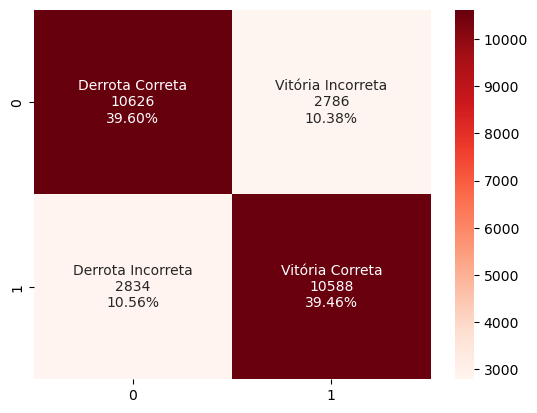

In [518]:
group_names = ['Derrota Correta','Vitória Incorreta','Derrota Incorreta','Vitória Correta']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

Para as de 15 minutos, o nosso preditor acertou 21.214 partidas. Ou seja, para partidas de 15 minutos, o nosso preditor é mais preciso.

Porém, em uma partida de League Of Legends, 5 minutos muda bastante coisa. Basta olhar pela precisão dos nossos preditores.

Será que o modelo de 10 minutos mantém a sua precisão em partidas de 15 minutos?

___
## **APLICANDO OS PREDITORES**
___

Para início, vamos adaptar a base de dados para os parâmetros que o nosso preditor de 10 minutos utiliza.

In [519]:
partidas_15min_blue_adaptado = partidas_15min_blue.loc[:,partidas_10min_blue8.columns]

Agora, vamos testar.

In [520]:
Xtest = partidas_15min_blue_adaptado.iloc[:,1:]

results = regress(partidas_10min_blue8)
yhat = results.predict(Xtest)
prediction = list(map(round,yhat))
#print('Real:',list(partidas_15min_blue5['blueWins'])[:10])
#print('Prediction:',prediction[:10])

print('\n')

cm = confusion_matrix(list(partidas_15min_blue_adaptado['blueWins']), prediction)

print(f'Test accuracy =', accuracy_score(list(partidas_15min_blue_adaptado['blueWins']), prediction).round(3))

Optimization terminated successfully.
         Current function value: 0.538975
         Iterations 6


Test accuracy = 0.667


Nossa, a precisão caiu.

Vamos ver na matriz de confusão.

<AxesSubplot: >

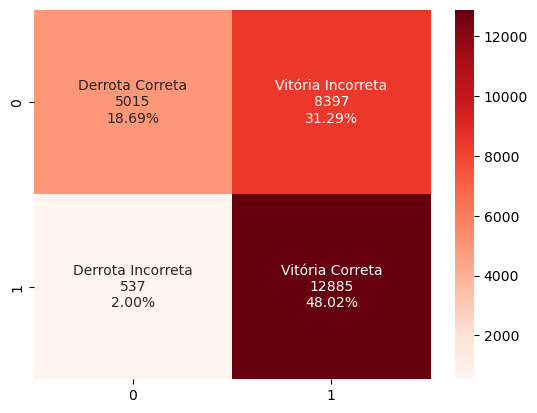

In [521]:
group_names = ['Derrota Correta','Vitória Incorreta','Derrota Incorreta','Vitória Correta']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

Mas e o preditor de 15 minutos na base de 10 minutos?

In [522]:
partidas_10min_blue_adaptado = partidas_10min_blue.loc[:,partidas_15min_blue5.columns]

Xtest = partidas_10min_blue_adaptado.iloc[:,1:]
results = regress(partidas_15min_blue5)
yhat = results.predict(Xtest)
prediction = list(map(round,yhat))
print('\n')
#print('Real:',list(partidas_10min_blue8['blueWins'])[:10])
#print('Prediction:',prediction[:10])

cm = confusion_matrix(list(partidas_10min_blue_adaptado['blueWins']), prediction)

print(f'Test accuracy =', accuracy_score(list(partidas_10min_blue_adaptado['blueWins']), prediction).round(3))

Optimization terminated successfully.
         Current function value: 0.447300
         Iterations 7


Test accuracy = 0.674


Ambos caíram a precisão.

E na matriz de confusão?

<AxesSubplot: >

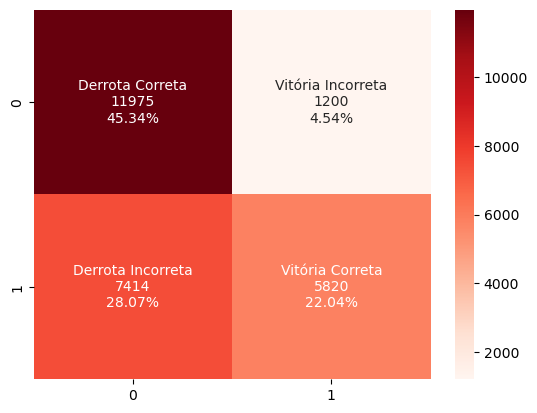

In [523]:
group_names = ['Derrota Correta','Vitória Incorreta','Derrota Incorreta','Vitória Correta']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')

A precisão de ambos os preditores caiu bastante com uma diferença de apenas 5 minutos.

___
## **CONCLUSÃO**
___

Obviamente, é muito difícil prever com uma precisão EXATA qual time vai ganhar. Existem vários fatores que não podem (e nem tem como) ser levados em conta.

Como um próprio jogador desse jogo, já houveram partidas em que, estatisticamente, eu deveria ter perdido. Mas, nos últimos 5 minutos, por algum motivo, meu time virou e nós ganhamos.

Mas podemos chegar próximo. 

Uma conclusão que é possível de ser tirada dessa análise é que, com os mesmos tipos de dados mas uma duração maior de partida, conseguimos prever com mais precisão qual time irá ganhar. Se houvesse um banco de dados com partidas de 20 minutos, é capaz de que nossa base de dados fosse mais precisa ao prever os resultados.

Mas, ao aplicar um preditor de um certo tempo em outro, a nossa precisão cai absurdamente por conta das rápidas mudanças em uma partida de League Of Legends.

Isso ocorre porque existem eventos que são desbloqueados depois de certo tempo de partida. Por exemplo, o barão (Riftherald) é desbloqueado pela primeira vez aos 15 minutos de partida, oferecendo uma grande vantagem para o time que conseguir ter ele.

Por isso que as variáveis significativas mudam bastante depois dos 15 minutos: algumas entram em conta quando o jogo progride.

Com isso, é possível concluir que o nosso preditor é bastante preciso, mas apenas para partidas o mais próximo possível do tempo medido.

___
## **REFERÊNCIAS**
___

- [Explicação da fórmula de Logit em Python](https://www.andrewvillazon.com/logistic-regression-python-statsmodels/)
- [Explicação dos gráficos de Logit](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)
- [Explicação da fórmula geral de Logit](https://www.statlect.com/fundamentals-of-statistics/logistic-model-maximum-likelihood)
- [Outra explicação de Logit](https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf)
- [Uma outra explicação de Logit](https://www.appstate.edu/~whiteheadjc/service/logit/intro.htm)
- [Link da base de dados](https://www.kaggle.com/datasets/gyejr95/league-of-legends-challenger-rank-game10min15min/data)